In [1]:
import os
import sys
from pathlib import Path

# Dynamically locate project root and set working dir
project_root = Path().resolve().parents[1]
os.chdir(project_root)
sys.path.append(str(project_root))


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Table of Contents
- [Data Description](#Data-Description)
    - [Feature Description](#Feature-Description)
    - [Data Profiling](#Data-Profiling)
- [Target and Feature Dependency Analysis](#Target-and-Feature-Dependency-Analysis)
    - [Data Analysis](#Data-Analysis)
    - [Analysis Conclusions](#Analysis-Conclusions)

# Data Description

In [2]:
df = pd.read_parquet('./data/raw_data/raw_data_full.parquet')

df.head()

datetime  season  yr  mnth  hr  holiday  weekday  workingday  \
0  2011-01-01 00:00:00       1   0     1   0        0        6           0   
1  2011-01-01 01:00:00       1   0     1   1        0        6           0   
2  2011-01-01 02:00:00       1   0     1   2        0        6           0   
3  2011-01-01 03:00:00       1   0     1   3        0        6           0   
4  2011-01-01 04:00:00       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
df.shape

(17379, 16)

## Feature Description

- datetime - hourly date + date

- season 
    -  1 = winter, 2 = spring, 3 = summer, 4 = fall


- year: [0, 1]


- month [1, 12]

- hour: [0, 23]

- holiday - whether the day is considered a holiday

- workingday - whether the day is neither a weekend nor holiday
- weathersit
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (casual + registered)

## Data Profiling

In [4]:
df.describe()

season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.171850   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed        casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.627229      0.190098     35.676218    153.786869    189.463088  
std        0.192930      0.122340     49.305030    151.357286    181.387599  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.480000      0.104500      4.000000     34.000000     40.000000  
50%        0.630000      0.194000     17.000000    115.000000    142.000000  
75%        0.780000      0.253700     48.000000    220.000000    281.000000  
max        1.000000      0.850700    367.000000    886.000000    977.000000

In [7]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 67.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Profiling Observations

1. No Missing Values
All 16 fields (season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, plus the datetime index) are 100 % complete—no nulls detected.

2. Strong Right Skew in Rental Counts
The cnt distribution is heavily right‐skewed: most days see moderate rentals, with a long tail of very high-demand days (e.g., special events or heatwaves). This means that for linear models especially this target will be hard to predict, so some transformation might be needed.

3. Registered Riders Dominate
On average, registered users make up ~75 % of all rentals (mean registered ≈ 150 vs. mean casual ≈ 35), and registered correlates with cnt at r ≈ 0.95.

4. Temperature Is a Key to predict the target (cnt)
temp (normalized [°C]) shows a strong positive correlation with cnt (r ≈ 0.4–0.5), peaking around 20–25 °C.

5. Holiday Impact
Rental counts on official holidays drop ~30 % below non‐holiday days, even if they fall on a weekday.

6. Categorical features all have few levels (season=4; yr=2; mnth=12; weekday=7; weathersit=4), making one-hot encoding straightforward if required.

7. As weather gets worse, the number of data samples decreases which makes the weather feature a good predictor.

8. Holiday is an imbalanced feature as expected since there are less days which are holidays.

# Target and Feature Dependency Analysis

## Data Analysis

### Target

Let's visualize the target using Plotly for easy scrolling along the time series

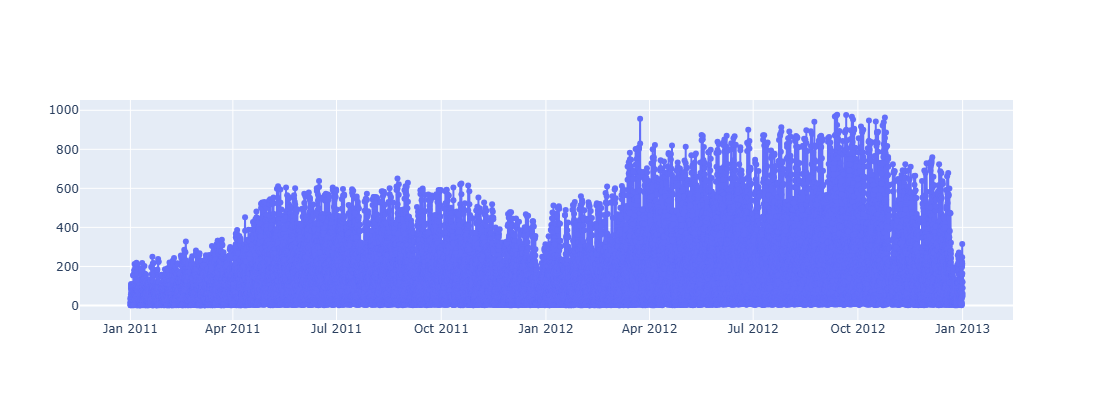

In [8]:
# Create figure
fig = go.Figure()

# Add trace
fig.add_trace(go.Scatter(
    x=df["datetime"],
    y=df["cnt"],
    mode="lines+markers",  # or "lines+markers"
    name="y value"
))

fig.update_layout(
    width=1000,    # width in pixels
    height=400    # height in pixels
)
fig.show()

Let's check what is the mean bike count profile during the day.

In [7]:
target_h = df.groupby('hr')['cnt'].mean() # Hourly mean data

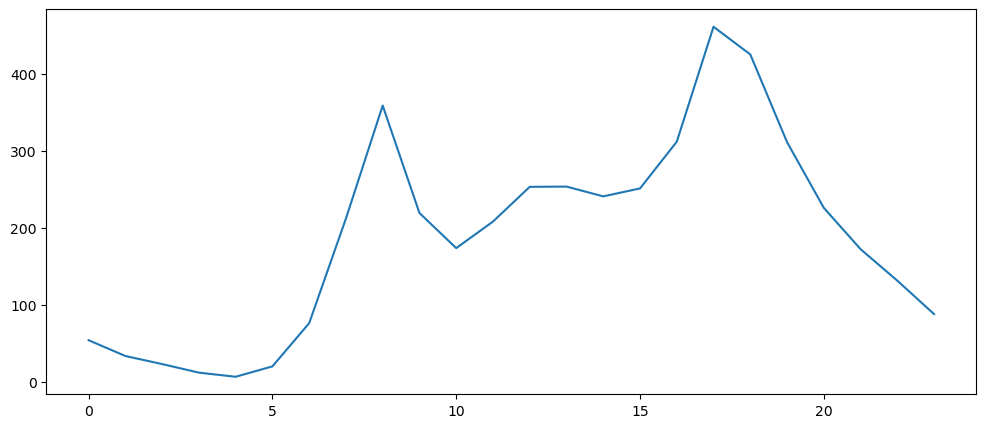

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(target_h)

**Target Observations**
- We can clearly see that the target has cyclical / seasonal behavior with different seasonalities.
- The most obvious is daily seasonality.
- Potentially, this can be modelled by a time series forecasting model. However, just a normal regression approach can also work because we have relevant features.
- We can see that during the night, the demand is the lowest.
- There are 2 demand peaks during the day - 7am and 17 pm. It's likely when people commute to work and back home. 


### Rentals by season

In [9]:
# define mapping
season_map = {
    1: "winter",
    2: "spring",
    3: "summer",
    4: "fall"
}

# apply mapping
df["season"] = df["season"].apply(lambda x: season_map.get(x, "unknown"))

In [10]:
season_stats = df.groupby('season')['cnt'].agg(['mean', 'median', 'count'])
season_stats

mean  median  count
season                           
fall    198.868856   155.5   4232
spring  208.344069   165.0   4409
summer  236.016237   199.0   4496
winter  111.114569    76.0   4242

Text(0, 0.5, 'Mean Count')

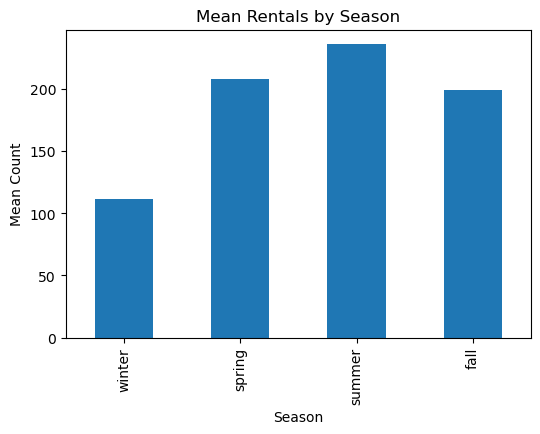

In [11]:
# assume df['season'] already mapped to names, and order defined
order = ["winter", "spring", "summer", "fall"]
season_mean = df.groupby('season')['cnt'].mean().reindex(order)

plt.figure(figsize=(6, 4))
season_mean.plot(kind='bar')
plt.title('Mean Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Mean Count')

### Rentals by weather

In [12]:
# 1) Define mapping and apply it
weather_map = {
    1: "clear",
    2: "mist/cloudy",
    3: "light rain/snow",
    4: "heavy rain/snow"
}
df['weathersit'] = df['weathersit'].map(weather_map)

In [13]:
# 2) Compute mean rentals by weather, in desired order
order = ["clear", "mist/cloudy", "light rain/snow", "heavy rain/snow"]
weather_mean = df.groupby('weathersit')['cnt'].mean().reindex(order)

Text(0, 0.5, 'Mean Count')

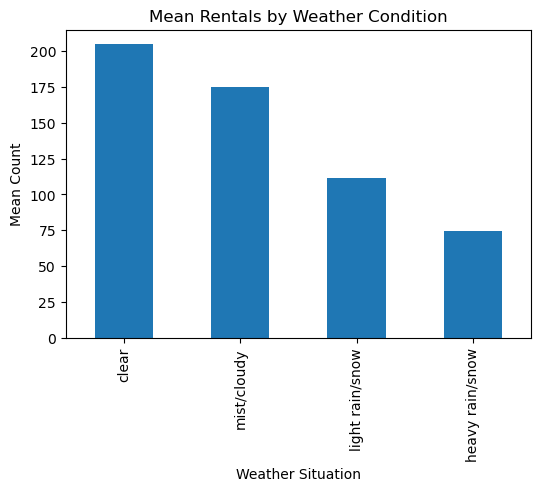

In [14]:
plt.figure(figsize=(6, 4))
weather_mean.plot(kind='bar')
plt.title('Mean Rentals by Weather Condition')
plt.xlabel('Weather Situation')
plt.ylabel('Mean Count')

### Rentals by weekday

In [15]:
# 1) Map weekday codes → names
weekday_map = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}
df["weekday_name"] = df["weekday"].map(weekday_map)

In [16]:
# 2) Compute mean rentals by weekday, in calendar order (Mon→Sun)
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_mean = df.groupby("weekday_name")["cnt"].mean().reindex(order)

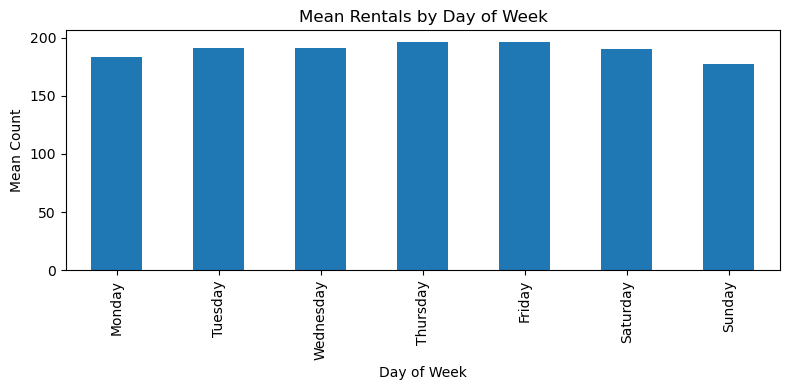

In [17]:
# 3) Plot
plt.figure(figsize=(8, 4))
weekday_mean.plot(kind="bar")
plt.title("Mean Rentals by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Mean Count")
plt.tight_layout()


In [18]:
# 1) Map holiday flag to human labels
holiday_map = {
    0: "Non-holiday",
    1: "Holiday"
}
df["holiday_name"] = df["holiday"].map(holiday_map)

In [19]:
# 2) Compute mean rentals by holiday status
order = ["Non-holiday", "Holiday"]
holiday_mean = df.groupby("holiday_name")["cnt"].mean().reindex(order)

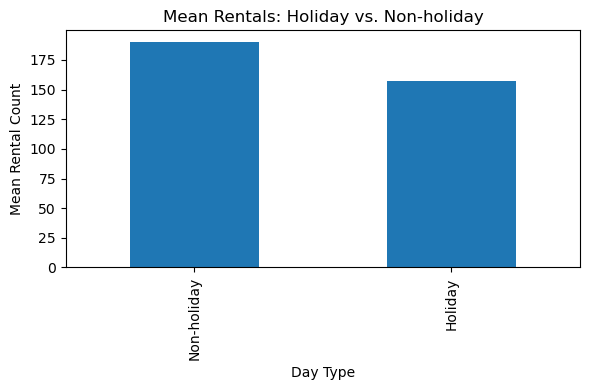

In [20]:
# 3) Plot
plt.figure(figsize=(6, 4))
holiday_mean.plot(kind="bar")
plt.title("Mean Rentals: Holiday vs. Non-holiday")
plt.xlabel("Day Type")
plt.ylabel("Mean Rental Count")
plt.tight_layout()

### Rental by working days

In [21]:
# 1) Map workingday flag to names
working_map = {
    0: "Non-working day",
    1: "Working day"
}
df["workingday_name"] = df["workingday"].map(working_map)

In [22]:
# 2) Compute mean rentals by working day status
order = ["Non-working day", "Working day"]
working_mean = df.groupby("workingday_name")["cnt"].mean().reindex(order)

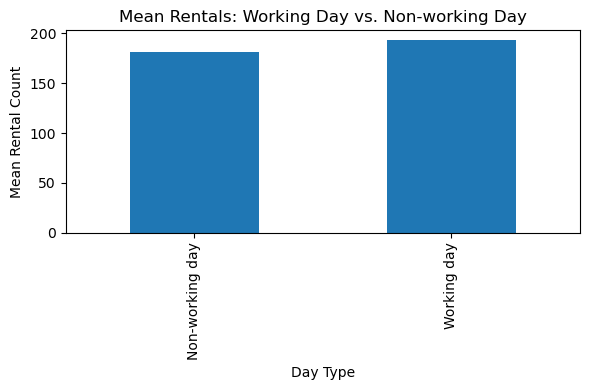

In [23]:
# 3) Plot
plt.figure(figsize=(6, 4))
working_mean.plot(kind="bar")
plt.title("Mean Rentals: Working Day vs. Non-working Day")
plt.xlabel("Day Type")
plt.ylabel("Mean Rental Count")
plt.tight_layout()

### Rental vs temperature

<Axes: xlabel='temp', ylabel='cnt'>

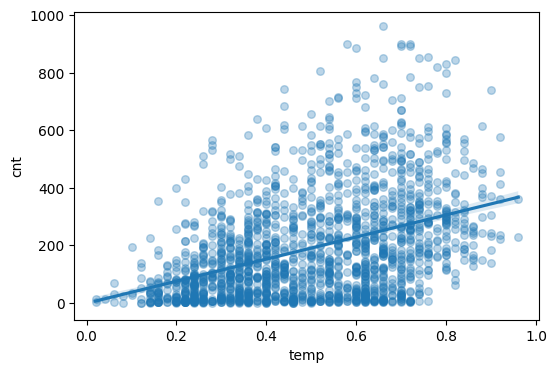

In [24]:
n = 10 # we cna plot n-th point for better visibilty
plt.figure(figsize=(6, 4))
sns.regplot(x=df['temp'][::n], y=df['cnt'][::n], scatter_kws={'alpha': 0.3, 's': 30})
# sns.regplot(x=df['temp'][::n], y=df['cnt'][::n], scatter_kws={'alpha': 0.3, 's': 30}, line_kws={'color': 'red', 'linewidth': 1})

### Rental vs humidity

<Axes: xlabel='hum', ylabel='cnt'>

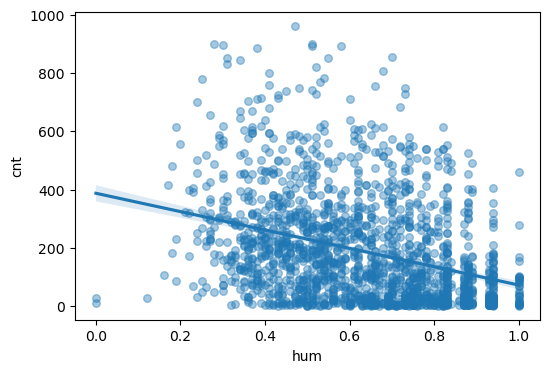

In [17]:
n = 10 # we cna plot n-th point for better visibilty
plt.figure(figsize=(6, 4))
sns.regplot(x=df['hum'][::n], y=df['cnt'][::n], scatter_kws={'alpha': 0.4, 's': 30})

### Rental vs windspeed

<Axes: xlabel='windspeed', ylabel='cnt'>

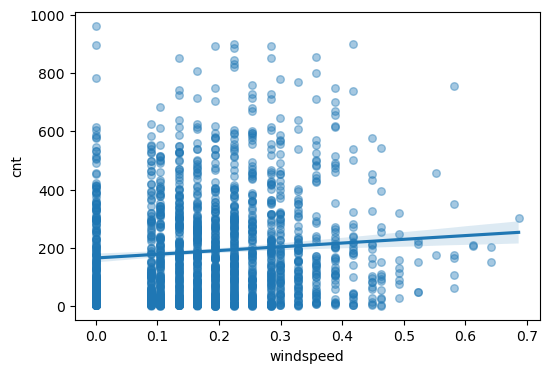

In [19]:
n = 10 # we cna plot n-th point for better visibilty
plt.figure(figsize=(6, 4))
sns.regplot(x=df['windspeed'][::n], y=df['cnt'][::n], scatter_kws={'alpha': 0.4, 's': 30})

## Analysis Conclusions

**Seasonality Effects**
- Mean rentals are lowest in Winter and highest in Summer and Spring.
- Fall has moderate rentals, suggesting weather strongly impacts usage.

**Weather Conditions**
- Rentals drop sharply as weather worsens.
- Clear weather has the highest rentals.
- Mist or cloudy conditions slightly reduce rentals.
- Light snow/rain causes a large drop.
- Heavy rain/snow leads to very low rentals.

**Weekday Patterns**
- Rentals are relatively uniform across all weekdays, with a slight drop on Sunday.
- Indicates no strong day-of-week effect, possibly due to consistent commuter behavior.

**Holidays vs Non-Holidays**
- Non-holidays have slightly more rentals than holidays.
- Suggests people use bikes more for commuting than for recreation.


**Temperature vs Rentals**
- Positive correlation: Higher temperatures are associated with more rentals.
- Indicates people prefer biking in warmer weather.
- We also see that there are a lot of zero rentals across the entire temperature range. This might be a challenge in terms of building a model

**Humidity vs Rentals**
- Negative trend: As humidity increases, rentals decrease.
- High humidity may discourage outdoor activity.
- Similar to temperature, many rentals are zero across a wide humidity range.

**Windspeed vs Rentals**
- Slight negative correlation: Higher windspeed slightly reduces rentals.
- But the effect is less pronounced than temperature or humidity.
- We also see that windspeed has a clear descrite behavior and overall does not seem to be a good feature for the model.

**Overall Conclusions**
- The target has a strong seasonal behavior, especially daily.
- Strong predictors: temp, season, weather, workingday – clear patterns with rentals.
- Moderate predictors: humidity (weak negative trend), weekday (slight variation).
- Weak predictor: windspeed – little impact on rentals.